# Azted G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sim_df = pd.read_pickle('../data/simulations/psuu-run-2024-03-11_15-04-10.pkl.gz')

<Axes: xlabel='timestep', ylabel='time_l1'>

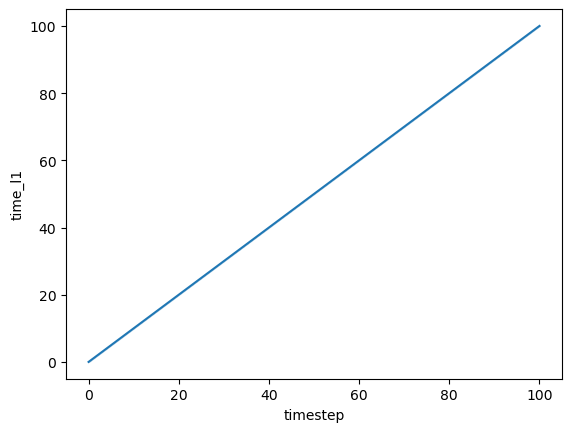

In [4]:
sns.lineplot(x=sim_df.timestep, y=sim_df.time_l1)

In [5]:
sim_df.head(4)

,time_l1,delta_l1_blocks,advance_l1_blocks,agents,current_process,transactions,gas_fee_l1,gas_fee_blob,finalized_blocks_count,cumm_block_rewards,cumm_fee_cashback,cumm_burn,token_supply,simulation,subset,run,timestep,delta_blocks
0,0,0,0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",None,{},NaN,NaN,0,200.0,50.0,50,"TokenSupply(circulating=155.76460460995284, st...",0,0,1,0,NaN
7,1,0,0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('129fe51b-7e19-4ec7-865c-784...,{},1.0,0.0,0,200.0,50.0,50,"TokenSupply(circulating=264.50928215460726, st...",0,0,1,1,0.0
14,2,0,0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('129fe51b-7e19-4ec7-865c-784...,{},1.0,0.0,0,200.0,50.0,50,"TokenSupply(circulating=264.50928215460726, st...",0,0,1,2,0.0
21,3,0,0,"{'relay': Agent(uuid='relay', balance=0.0, is_...",Process(uuid=UUID('129fe51b-7e19-4ec7-865c-784...,{},46.0,0.0,0,200.0,50.0,50,"TokenSupply(circulating=264.50928215460726, st...",0,0,1,3,0.0


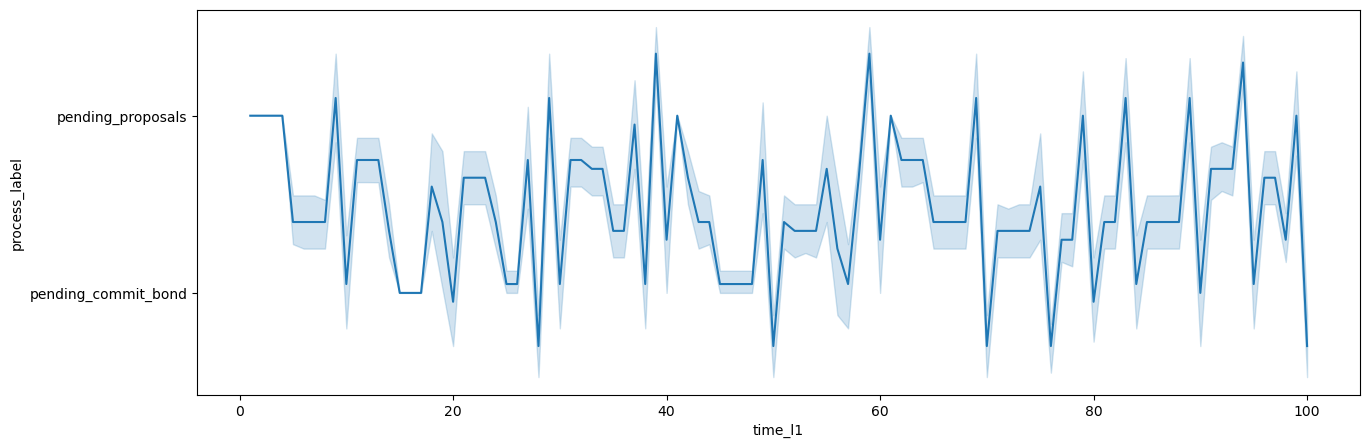

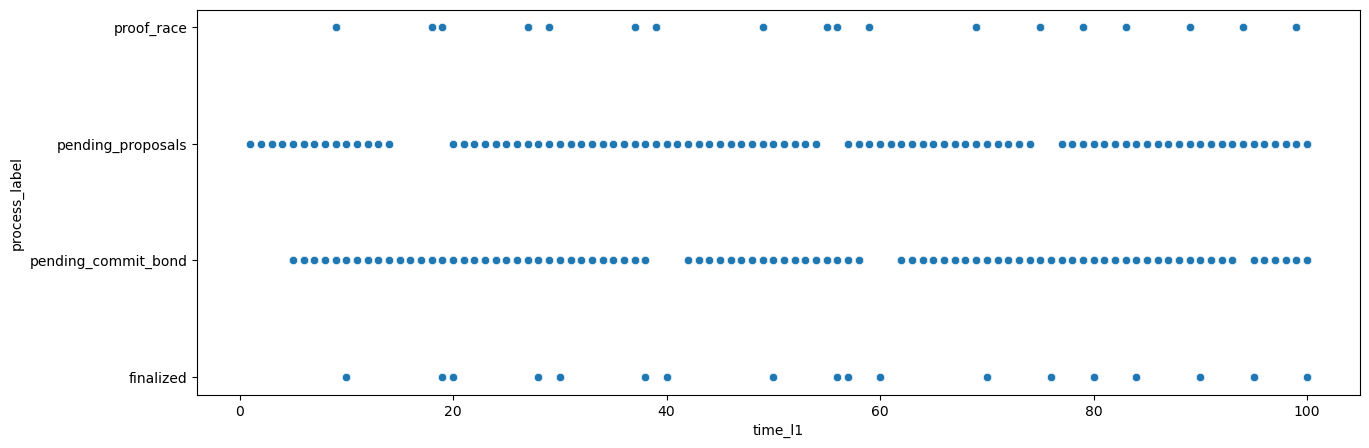

In [24]:
fig_df = sim_df.copy()
fig_df['process_order'] = fig_df.current_process.map(lambda x: x.phase.value if x is not None else None)
fig_df['process_label'] = fig_df.current_process.map(lambda x: x.phase.name if x is not None else None)
fig_df = fig_df.sort_values(['process_order', 'timestep'])#.query("time_l1 > 320 & time_l1 < 370")


plt.figure(figsize=(15, 5))
sns.lineplot(x=fig_df.time_l1, 
             y=fig_df.process_label)

plt.figure(figsize=(15, 5))
sns.scatterplot(x=fig_df.time_l1, 
             y=fig_df.process_label)
plt.show()

In [7]:
fig_df.set_index('time_l1').sort_index().process_label

time_l1
0                     None
0                     None
0                     None
0                     None
0                     None
              ...         
100              finalized
100              finalized
100      pending_proposals
100    pending_commit_bond
100              finalized
Name: process_label, Length: 4040, dtype: object

In [8]:
sim_df.iloc[-1]

time_l1                                                                 100
delta_l1_blocks                                                           0
advance_l1_blocks                                                         0
agents                    {'relay': Agent(uuid='relay', balance=0.0, is_...
current_process           Process(uuid=UUID('b9fb8a17-4fab-4654-bec0-25c...
transactions              {da0b94a6-0b55-43f1-a1e5-9f29618e22a5: Proposa...
gas_fee_l1                                                              1.0
gas_fee_blob                                                            7.0
finalized_blocks_count                                                    5
cumm_block_rewards                                                    205.0
cumm_fee_cashback                                                 50.037062
cumm_burn                                                                50
token_supply              TokenSupply(circulating=279.54634415460725, st...
simulation  

<Axes: xlabel='time_l1', ylabel='finalized_blocks_count'>

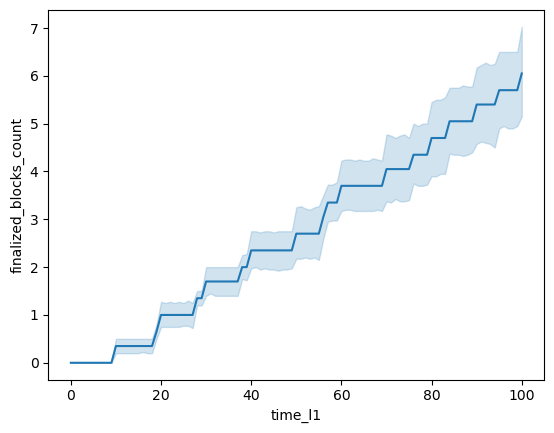

In [9]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.finalized_blocks_count)

<Axes: xlabel='time_l1', ylabel='cumm_block_rewards'>

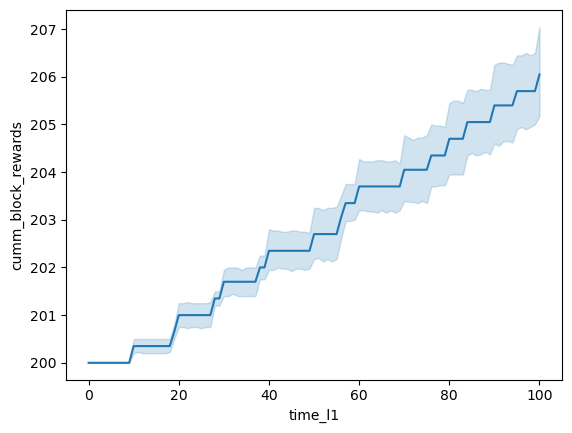

In [10]:
sns.lineplot(x=sim_df.time_l1, 
             y=sim_df.cumm_block_rewards)

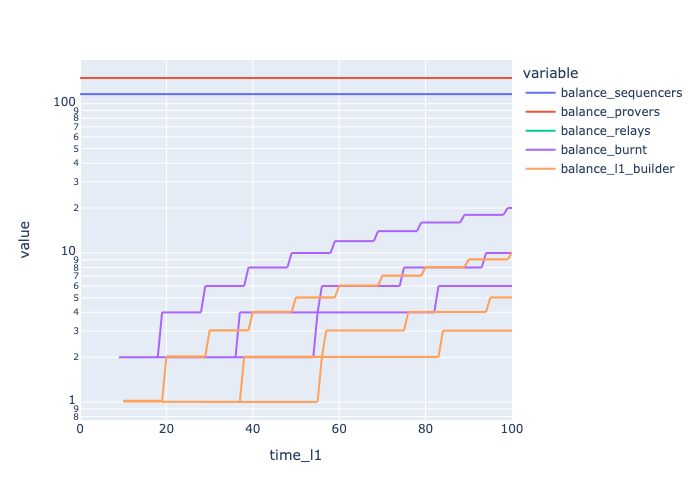

In [17]:
sim_df['balance_sequencers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_sequencer == True))
sim_df['balance_provers'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_prover == True))
sim_df['balance_relays'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.is_relay == True))
sim_df['balance_burnt'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'burnt'))
sim_df['balance_l1_builder'] = sim_df.agents.map(lambda x: sum(el.balance for el in x.values() if el.uuid == 'l1-builder'))


px.line(sim_df,
        x='time_l1',
        y=['balance_sequencers', 
           'balance_provers',
           'balance_relays',
           'balance_burnt',
           'balance_l1_builder'],
        log_y=True)

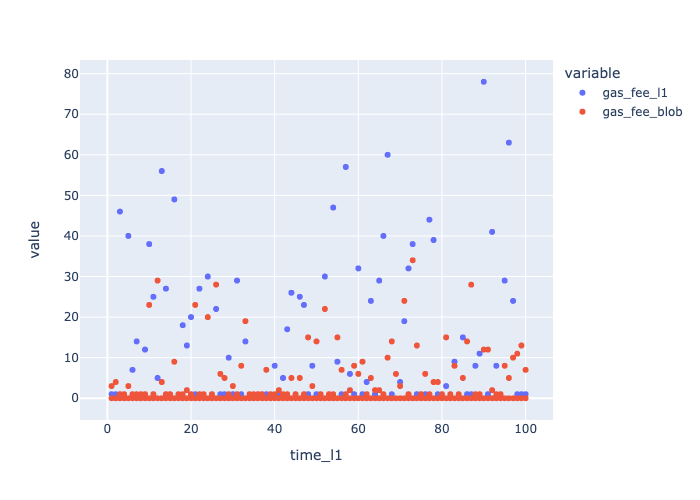

In [12]:
px.scatter(sim_df,
        x='time_l1',
        y=['gas_fee_l1', 'gas_fee_blob'])

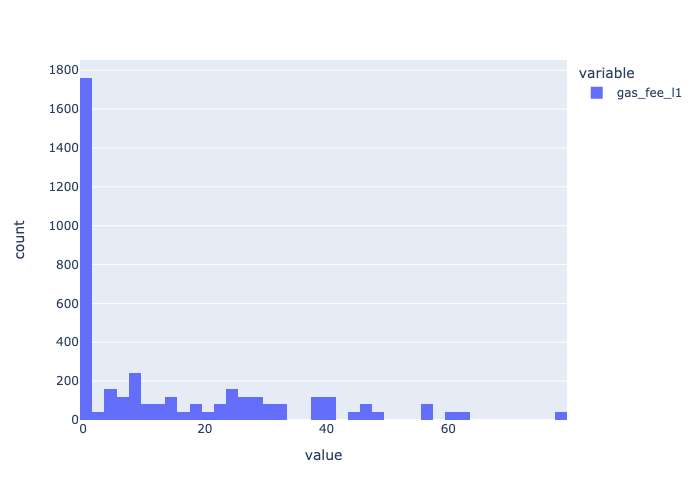

In [13]:
px.histogram(sim_df,
        x=['gas_fee_l1'])

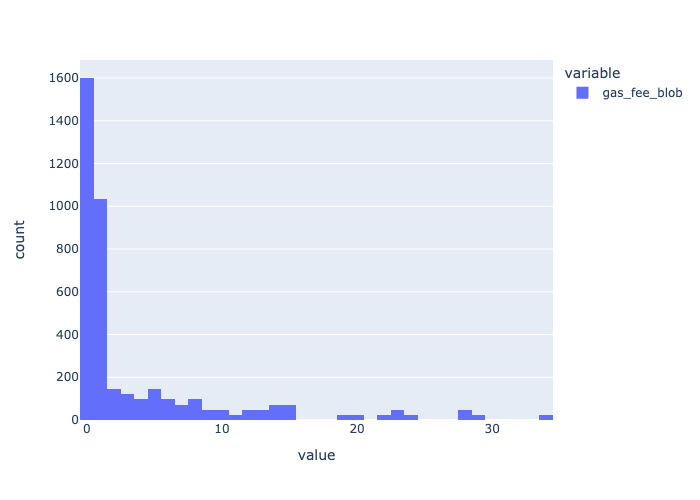

In [14]:
px.histogram(sim_df,
        x=['gas_fee_blob'])

In [15]:
sim_df.gas_fee_l1.min()

1.0